In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
print("Please upload your kaggle.json file:")
uploaded=files.upload()

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json


In [ ]:
uploaded

{'kaggle.json': b'{"username":"greeshmavilasagarapu","key":"4b4e781555e7d24751434e71d97c10b8"}'}

In [ ]:
import os
os.makedirs('/root/.kaggle',exist_ok=True)

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!cp kaggle.json /root/.kaggle/

In [ ]:
#set proper permission
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
print("Kaggle API credentials set up successfully!")
!kaggle --version

Kaggle API credentials set up successfully!
Kaggle API 1.7.4.5


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [00:32<00:00, 78.2MB/s]
100% 2.70G/2.70G [00:32<00:00, 88.5MB/s]


In [ ]:
#unzipping of the above file

In [ ]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [ ]:
import zipfile

In [ ]:
zip_file='new-plant-diseases-dataset.zip'
with zipfile.ZipFile(zip_file,'r') as zip_ref:
  zip_ref.extractall('plantdemo')

In [ ]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  plantdemo	sample_data


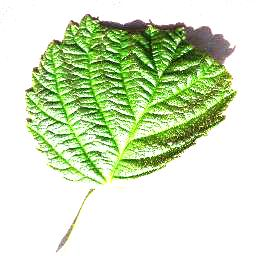

In [ ]:
#Analyse a particular image
from PIL import Image
import IPython.display as display
image_path= '/content/plantdemo/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Raspberry___healthy/00a3fc0e-64cc-4e35-ac2f-aef04fda9b22___Mary_HL 9177_newPixel25.JPG'
with open(image_path, 'rb') as f:
  display.display(display.Image(data=f.read(),width=300))

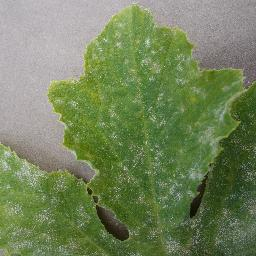

In [ ]:
#Analyse a particular image
from PIL import Image
import IPython.display as display
image_path= '/content/plantdemo/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Squash___Powdery_mildew/0061de03-5f84-413a-b30d-1bb575cf3267___UMD_Powd.M 0415.JPG'
with open(image_path, 'rb') as f:
  display.display(display.Image(data=f.read(),width=300))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)#training
test_datagen=ImageDataGenerator(rescale=1./255)#testing

In [ ]:
train_generator=train_datagen.flow_from_directory('/content/plantdemo/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                  target_size=(256,256),
                                                  batch_size=32,
                                                  class_mode='categorical')
validation_generator=test_datagen.flow_from_directory('/content/plantdemo/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                                      target_size=(256,256),
                                                      batch_size=32,
                                                      class_mode='categorical')



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
sample={v:k for k,v in train_generator.class_indices.items()}

In [ ]:
sample[37]

'Tomato___healthy'

In [ ]:
from keras.models  import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model=Sequential()#empty nn
model.add(Conv2D(32,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
num_classes=38
model.add(Dense(num_classes,activation='softmax')) #sigmoid

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    15,745,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,766,950 (60.15 MB)

 Trainable params: 15,766,950 (60.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,
                  batch_size=16,
                  epochs=5,
                  validation_data=validation_generator,
                  validation_batch_size=16
                  )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1156s 522ms/step - accuracy: 0.4822 - loss: 1.9029 - val_accuracy: 0.7290 - val_loss: 0.9163
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1095s 498ms/step - accuracy: 0.8105 - loss: 0.6068 - val_accuracy: 0.8090 - val_loss: 0.6748
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1009s 459ms/step - accuracy: 0.8581 - loss: 0.4439 - val_accuracy: 0.8567 - val_loss: 0.5287
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1044s 475ms/step - accuracy: 0.8922 - loss: 0.3374 - val_accuracy: 0.8393 - val_loss: 0.6434
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1021s 465ms/step - accuracy: 0.9125 - loss: 0.2726 - val_accuracy: 0.8118 - val_loss: 0.7275


In [ ]:
model.save('plant_disease_model.h5') #saving the model

In [ ]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  plantdemo	sample_data


In [ ]:
model.get_metrics_result() #find accuracy and loss

{'accuracy': 0.811802864074707, 'loss': 0.7275028824806213}

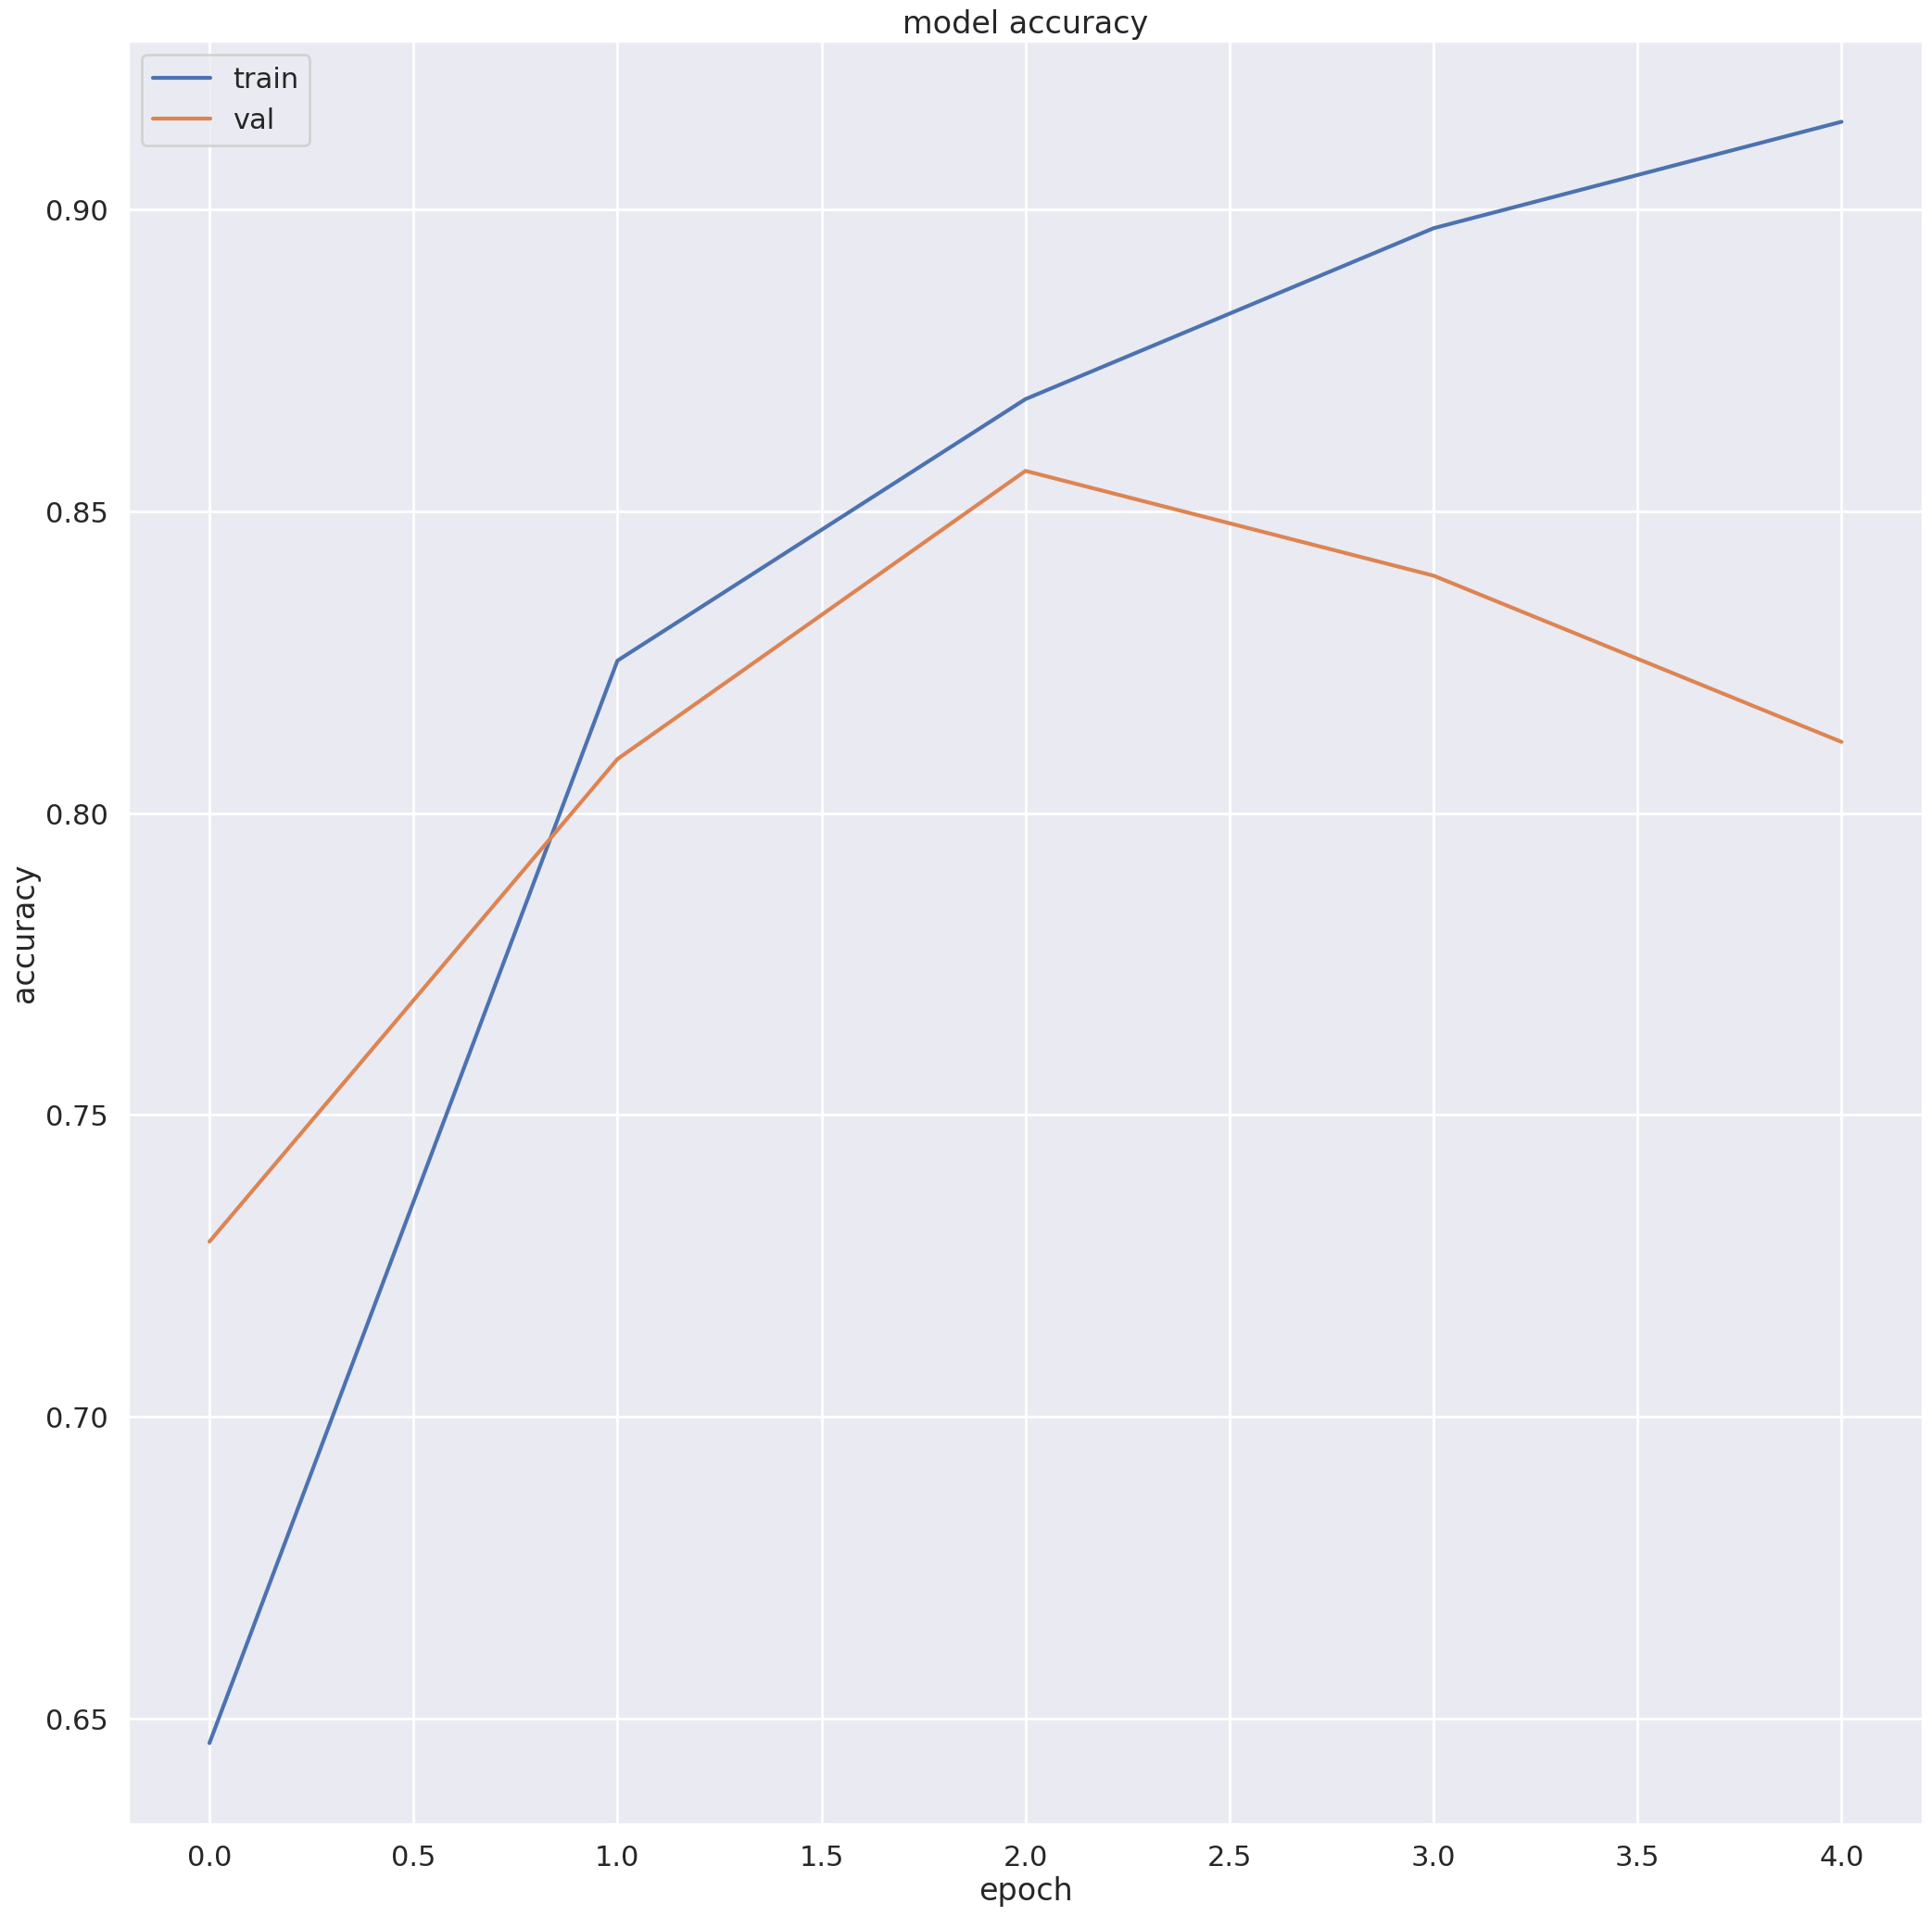

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme()
sns.set_context("poster")
figure(figsize=(25,25),dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
def preprocess_image(image_path,target_size=(256,256)):
  img=load_img(image_path, target_size=target_size)
  x=img_to_array(img)
  x=x.astype('float32')/255.
  x=np.expand_dims(x,axis=0)
  return x
x=preprocess_image('/content/plantdemo/test/test/PotatoEarlyBlight4.JPG')

In [ ]:
predictions=model.predict(x)
sample[np.argmax(predictions[0])]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'Potato___Early_blight'

In [ ]:
#For existing model
#import keras
#model=keras.models.load_model('plant_disease_model.h5')
#p=model.predict(x)[0]
#sample={v:k for k,v in train_generator.class_indices.items()}
#sample[np.argamx(p)]